In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

#load a dataset

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/WELFake_Dataset.csv.zip")

#Analyze  the data

In [ ]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [ ]:
data.loc[10]['title']

' GOP Senator Just Smacked Down The Most Punchable Alt-Right Nazi On The Internet'

In [ ]:
data2=data[['text','label']]

In [ ]:
data2.dropna(inplace=True)

<ipython-input-11-401a78861e1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna(inplace=True)


In [ ]:
data2.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [ ]:
data2.label.value_counts()

label
1    37067
0    35028
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

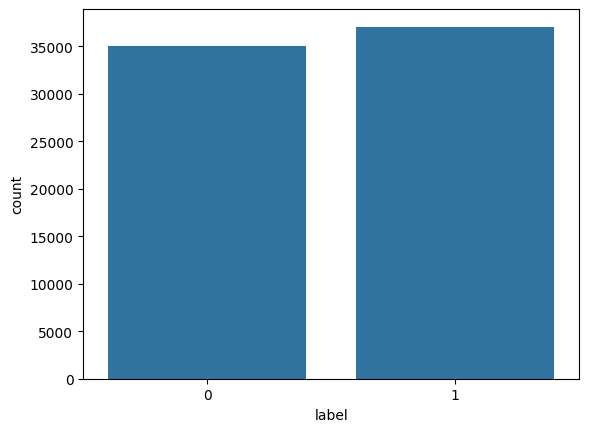

In [ ]:
sns.countplot(data=data2,x='label')

#Data Preprocessing

In [ ]:
text=data2['text']

In [ ]:
data2.reset_index(inplace=True)

In [ ]:
import regex as re
corpus=[]
from nltk.stem import PorterStemmer
ps= PorterStemmer()
for i in range(data2.shape[0]):
    review = re.sub('[^a-zA-Z]',' ', data2['text'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review="  ".join(review)
    corpus.append(review)

In [ ]:
len(corpus)

2100

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
wc= Wordcloud(max_font_size=300,width=800,height=600).generate(str())

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM,Bidirectional,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential

In [ ]:
voc_size = 5000

In [ ]:
one_hot_repr=[one_hot(words,voc_size)for words in corpus]


In [ ]:
sent_length=500
embedded =pad_sequences(one_hot_repr,padding='pre',maxlen=sent_length)
print(embedded)

[[   0    0    0 ... 1096 3004 4814]
 [   0    0    0 ... 1510 3043 4136]
 [   0    0    0 ... 3027 4604 3888]
 ...
 [  34  741 2518 ... 4562  522 4949]
 [1096 2585   63 ... 1379 1595 1562]
 [   0    0    0 ...  341  598 3600]]


In [ ]:
from sklearn.model_selection import train_test_split
x=np.array(embedded)
y=np.array(data2.label[:4208])

In [ ]:
x.shape

(4208, 500)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=Sequential()
model.add(Embedding(voc_size,100))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
53/53 [==============================] - 95s 2s/step - loss: 0.5517 - accuracy: 0.7219
Epoch 2/10
53/53 [==============================] - 91s 2s/step - loss: 0.2341 - accuracy: 0.9097
Epoch 3/10
53/53 [==============================] - 92s 2s/step - loss: 0.1487 - accuracy: 0.9501
Epoch 4/10
53/53 [==============================] - 91s 2s/step - loss: 0.1010 - accuracy: 0.9676
Epoch 5/10
53/53 [==============================] - 90s 2s/step - loss: 0.0578 - accuracy: 0.9822
Epoch 6/10
53/53 [==============================] - 93s 2s/step - loss: 0.0296 - accuracy: 0.9923
Epoch 7/10
53/53 [==============================] - 91s 2s/step - loss: 0.0198 - accuracy: 0.9964
Epoch 8/10
53/53 [==============================] - 91s 2s/step - loss: 0.0066 - accuracy: 0.9991
Epoch 9/10
53/53 [==============================] - 93s 2s/step - loss: 0.0130 - accuracy: 0.9979
Epoch 10/10
53/53 [==============================] - 104s 2s/step - loss: 0.0077 - accuracy: 0.9991


In [ ]:
y_pred=model.predict(x_test)


27/27 [==============================] - 8s 251ms/step


In [ ]:
y_p=np.round(y_pred).reshape(-1).astype(int)

In [ ]:
y_test

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_p)*100

88.00475059382423